# Computer Vision Nanodegree

## Project: Image Captioning

---

In this notebook, you will use your trained model to generate captions for images in the test dataset.

This notebook **will be graded**.  

Feel free to use the links below to navigate the notebook:
- [Step 1](#step1): Get Data Loader for Test Dataset 
- [Step 2](#step2): Load Trained Models
- [Step 3](#step3): Finish the Sampler
- [Step 4](#step4): Clean up Captions
- [Step 5](#step5): Generate Predictions!

<a id='step1'></a>
## Step 1: Get Data Loader for Test Dataset

Before running the code cell below, define the transform in `transform_test` that you would like to use to pre-process the test images.  

Make sure that the transform that you define here agrees with the transform that you used to pre-process the training images (in **2_Training.ipynb**).  For instance, if you normalized the training images, you should also apply the same normalization procedure to the test images.

In [1]:
!pip install pycocotools

    100% |████████████████████████████████| 1.5MB 7.1MB/s 
  Running setup.py bdist_wheel for pycocotools ... done
  Stored in directory: /root/.cache/pip/wheels/dc/e6/36/0e1ae88c868eb42d3f92181b1c9bbd0b217a7ec3da6bd62e55
Successfully built pycocotools
thinc 6.10.2 has requirement cytoolz<0.9,>=0.8, but you'll have cytoolz 0.9.0.1 which is incompatible.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from torchvision import transforms

# TODO #1: Define a transform to pre-process the testing images.
transform_test = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])


batch_size = 1         # batch size
vocab_threshold = 5        # minimum word count threshold
vocab_from_file = True    # if True, load existing vocab file
embed_size = 256           # dimensionality of image and word embeddings
hidden_size = 512         # number of features in hidden state of the RNN decoder



#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Create the data loader.
data_loader =  get_loader(transform=transform_test,
                         mode='test',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=vocab_from_file)

Vocabulary successfully loaded from vocab.pkl file!


Run the code cell below to visualize an example test image, before pre-processing is applied.

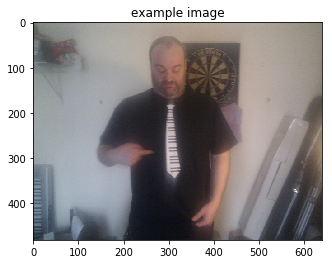

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
orig_image, image = next(iter(data_loader))

# Visualize sample image, before pre-processing.
plt.imshow(np.squeeze(orig_image))
plt.title('example image')
plt.show()

<a id='step2'></a>
## Step 2: Load Trained Models

In the next code cell we define a `device` that you will use move PyTorch tensors to GPU (if CUDA is available).  Run this code cell before continuing.

In [4]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Before running the code cell below, complete the following tasks.

### Task #1

In the next code cell, you will load the trained encoder and decoder from the previous notebook (**2_Training.ipynb**).  To accomplish this, you must specify the names of the saved encoder and decoder files in the `models/` folder (e.g., these names should be `encoder-5.pkl` and `decoder-5.pkl`, if you trained the model for 5 epochs and saved the weights after each epoch).  

### Task #2

Plug in both the embedding size and the size of the hidden layer of the decoder corresponding to the selected pickle file in `decoder_file`.

In [5]:
import os
encoder_file = 'encoder-3.pkl'
decoder_file = '/decoder-3.pkl'

os.path.join('./models', encoder_file)

'./models/encoder-3.pkl'

In [ ]:
os.path.join('./models', encoder_file)

In [6]:
# Watch for any changes in model.py, and re-load it automatically.
% load_ext autoreload
% autoreload 2

import os
import torch
from model import EncoderCNN, DecoderRNN

# TODO #2: Specify the saved models to load.
encoder_file = 'encoder-3.pkl' 
decoder_file = 'decoder-3.pkl'

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 256
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

# Move models to GPU if CUDA is available.
encoder.to(device)
decoder.to(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


DecoderRNN(
  (embed): Embedding(8856, 256)
  (lstm): LSTM(256, 512, num_layers=2, batch_first=True)
  (linear): Linear(in_features=512, out_features=8856, bias=True)
)

<a id='step3'></a>
## Step 3: Finish the Sampler

Before executing the next code cell, you must write the `sample` method in the `DecoderRNN` class in **model.py**.  This method should accept as input a PyTorch tensor `features` containing the embedded input features corresponding to a single image.

It should return as output a Python list `output`, indicating the predicted sentence.  `output[i]` is a nonnegative integer that identifies the predicted `i`-th token in the sentence.  The correspondence between integers and tokens can be explored by examining either `data_loader.dataset.vocab.word2idx` (or `data_loader.dataset.vocab.idx2word`).

After implementing the `sample` method, run the code cell below.  If the cell returns an assertion error, then please follow the instructions to modify your code before proceeding.  Do **not** modify the code in the cell below. 

In [7]:
# Move image Pytorch Tensor to GPU if CUDA is available.
image = image.to(device)

# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)

#print('output:',output)

#print('output', output.data.cpu())

output= output.data.cpu()
output = output.numpy().tolist()
#output_copy = output.data.cpu().numpy()
#output = output_copy


#print(output_copy)
#print('example output:', output)

assert (type(output)==list), "Output needs to be a Python list" 
assert all([type(x)==int for x in output]), "Output should be a list of integers." 
assert all([x in data_loader.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."

In [6]:
output

[0, 3, 169, 6, 91, 574, 71, 3, 334, 77, 3, 28, 18, 1, 18, 1, 1, 18, 1, 1]

In [3]:
import torch
output = torch.tensor([1,1,2,3,4])

In [8]:
assert all([x in data_loader.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."

<a id='step4'></a>
## Step 4: Clean up the Captions

In the code cell below, complete the `clean_sentence` function.  It should take a list of integers (corresponding to the variable `output` in **Step 3**) as input and return the corresponding predicted sentence (as a single Python string). 

In [2]:
output = [    0,     3,  1921,   130,   170,    39,    32,   196,    77,
           32,   136,    18,     1,    18,     1,    18,     1,    18,
            1,     1]

In [15]:
true_index = [x in list1 for x in words]

In [3]:
caption_list = ['this','is','a','sample','image']
x=' '.join(caption_list)


In [14]:
output[1]

3

In [16]:
data_loader.dataset.vocab.start_word

'<start>'

In [ ]:
data_loader.dataset.vocab('')

In [ ]:
data_loader.dataset.vocab(token)

In [22]:
list(data_loader.dataset.vocab.word2idx.items())[:0]

[]

In [25]:
list(data_loader.dataset.vocab.word2idx.items())[5]

('clean', 5)

In [26]:
list(data_loader.dataset.vocab.word2idx.items())[5][0]

'clean'

In [15]:
data_loader.dataset.vocab.idx2word(output[1])

TypeError: 'dict' object is not callable

In [11]:
# TODO #4: Complete the function.
import re
caption_list = []
def clean_sentence(output):
    caption_list = []
    for token in output:
        #caption_list.append(data_loader.dataset.vocab.idx2word(token))
        caption_list.append(list(data_loader.dataset.vocab.word2idx.items())[token][0])    
    sentence = ' '.join(caption_list)
    sentence = " ".join(filter(lambda x:x[0]!='<',sentence.split()))
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)
    return sentence

After completing the `clean_sentence` function above, run the code cell below.  If the cell returns an assertion error, then please follow the instructions to modify your code before proceeding.

In [12]:
sentence = clean_sentence(output)
print('example sentence:', sentence)

assert type(sentence)==str, 'Sentence needs to be a Python string!'

example sentence: a man in a black shirt is holding a cell phone to his ear 


In [2]:
#string1 = "<start> a man and woman pose for a picture in a room . <end> . <end> <end> . <end> <end>"

In [9]:
#1
#string2 = " ".join(filter(lambda x:x[0]!='<',string1.split()))

In [11]:
# remove all dots
#re.sub('[^A-Za-z0-9]+', ' ', string2)

'a man and woman pose for a picture in a room '

In [13]:
sentence = "<start> a man and woman pose for a picture in a room . <end> . <end> <end> . <end> <end>"
sentence = " ".join(filter(lambda x:x[0]!='<',sentence.split()))
sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)

In [14]:
s#entence

'a man and woman pose for a picture in a room '

In [7]:
#import re
#re.sub(r'(\s)<\w+', r'\1', '<start> a man and woman')

'<start> a man and woman'

<a id='step5'></a>
## Step 5: Generate Predictions!

In the code cell below, we have written a function (`get_prediction`) that you can use to use to loop over images in the test dataset and print your model's predicted caption.

In [13]:
def get_prediction():
    orig_image, image = next(iter(data_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    image = image.to(device)
    features = encoder(image).unsqueeze(1)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)

Run the code cell below (multiple times, if you like!) to test how this function works.

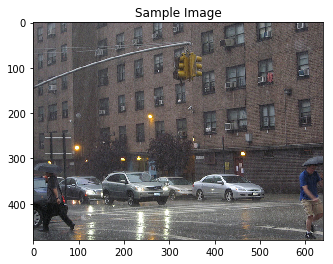

a city street with a traffic light and a traffic light view 


In [14]:
get_prediction()

As the last task in this project, you will loop over the images until you find four image-caption pairs of interest:
- Two should include image-caption pairs that show instances when the model performed well.
- Two should highlight image-caption pairs that highlight instances where the model did not perform well.

Use the four code cells below to complete this task.

### The model performed well!

Use the next two code cells to loop over captions.  Save the notebook when you encounter two images with relatively accurate captions.

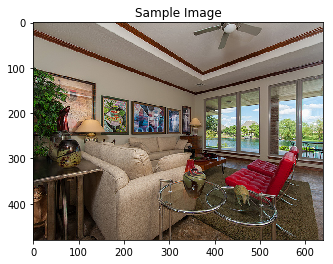

a living room with a couch and a table a window 


In [15]:
get_prediction()

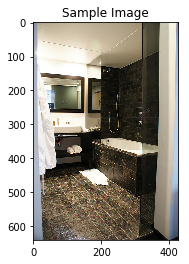

a bathroom with a sink and a toilet in it it 


In [16]:
get_prediction()

### The model could have performed better ...

Use the next two code cells to loop over captions.  Save the notebook when you encounter two images with relatively inaccurate captions.

In [ ]:
get_prediction()

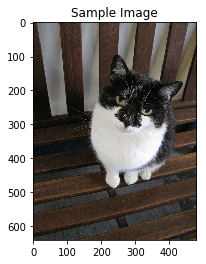

<start> a cat is sitting on a chair in a room . <end> . <end> . <end> . <end> <end>


In [35]:
get_prediction()